In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

T1 = np.asarray([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800])
T2 = []
T3 = []
T4 = []
T5 = []
T6 = []
T7 = []
T8 = []
T9 = []
T10 = []
T11 = []
T12 = []

POS1 = np.asarray([15.61,15.61,15.27,16.23,14.91,14.33,16.56,16.56,17.49,19.07,20.35,21.28,26.52,24.80,30.14,27.40,27.97,30.40,31.42,32.84,34.65,36.13,38.15,40.89,41.57,44.03,43.62,44.03,44.03])
POS2 = []
POS3 = []
POS4 = []
POS5 = []
POS6 = []
POS7 = []
POS8 = []
POS9 = []
POS10 = []
POS11 = []
POS12 = []

Funciones para hacer cudrados minimos:

In [2]:
def ajuste_lineal(x, y, sigma_x, sigma_y):
    """
    Calcula la regresión lineal de los datos, y propaga sus incertezas.
    """
    X = np.mean(x) # valor medio de x_i: <x>
    Y = np.mean(y) # valor medio de y_i: <y>
    X2 = np.mean(x**2) # valor medio de x_i^2: <x^2>
    XY = np.mean(x*y) # valor medio de x_i*y_i: <xy>
    N = x.size # número de mediciones

    # lo defino en una variable separada porque aparece seguido en las cuentas:
    dX2 = X2 - X**2  # <x^2> - <x>^2

    # calculo los coeficientes de la regresión
    a = (XY-X*Y)/dX2
    b = (Y*X2 - XY*X)/dX2

    # derivadas de los coeficientes
    da_dx = ( (y - Y)*dX2 - 2*(x - X)*(XY - X*Y) ) / ( N * dX2**2 )
    da_dy = (x - X) / ( N * dX2 )

    db_dx = ( (2*x*Y - y*X - XY)*dX2 - 2*(x - X)*(Y*X2 - XY*X) ) / ( N * dX2**2 )
    db_dy = (X2 - x*X) / ( N * dX2 )

    # calculo la matriz de covarianza
    var_a = np.sum(da_dx**2 * sigma_x**2 + da_dy**2 * sigma_y**2) # cov(a, a)
    var_b = np.sum(db_dx**2 * sigma_x**2 + db_dy**2 * sigma_y**2) # cov(b, b)
    cov_ab = np.sum(da_dx * db_dx * sigma_x**2 + da_dy * db_dy * sigma_y**2)  # cov(a, b)
    cov_matrix = np.asarray([[var_a, cov_ab], [cov_ab, var_b]])

    return a, b, cov_matrix


def lineal_ajustada(x, a, b, sigma_x, cov):
    """
    Evalúa la regresión lineal con parámetros de ajustes `a` y `b`,
    y propaga las incertezas a partir de `sigma_x` y la matriz de covarianza `cov`.
    """
    y = a*x + b
    sigma_y = ( a**2 * sigma_x**2 + x**2 * cov[0, 0] + cov[1, 1] + 2*x*cov[0, 1] )**0.5
    return y, sigma_y

v=0.012205123152709368 ± 0.00033292257121385647
d0=10.5631724137931 ± 0.5429802816004432
cov(v, d0) = -0.00015517241379310346


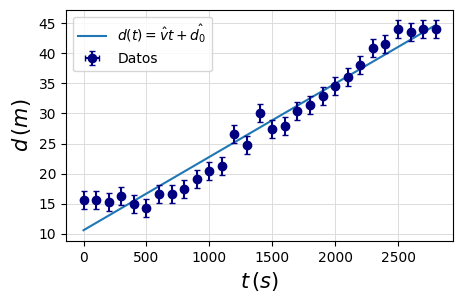

In [3]:
t = np.asarray([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800])
d = np.asarray([15.61,15.61,15.27,16.23,14.91,14.33,16.56,16.56,17.49,19.07,20.35,21.28,26.52,24.80,30.14,27.40,27.97,30.40,31.42,32.84,34.65,36.13,38.15,40.89,41.57,44.03,43.62,44.03,44.03])

sigma_t = 0 # incerteza en el tiempo
sigma_d = 1.5  # incerteza en la distancia

# hago la regresión lineal usando la rutina `ajuste_lineal`
v, d0, cov = ajuste_lineal(t, d, sigma_t, sigma_d)

# la desviación estándar es la raiz de la varianza:
sigma_v = cov[0, 0]**0.5  # incerteza en v
sigma_d0 = cov[1, 1]**0.5 # incerteza en d_0

print(f'v={v} ± {sigma_v}')
print(f'd0={d0} ± {sigma_d0}')
print(f'cov(v, d0) = {cov[0, 1]}')

# grafico los datos junto al ajuste
x = np.linspace(0, max(t), 100)
y = v * x + d0 # la recta de ajuste evaluada

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.set_axisbelow(True)
ax.grid(True, c='gainsboro', linewidth=0.7)
ax.set_xlabel(r'$t\,(s)$', size=15)
ax.set_ylabel(r'$d\,(m)$', size=15)

ax.plot(x, y, color='tab:blue', label=r'$d(t) = \hat{v} t + \hat{d_0}$') # recta ajustada
ax.errorbar(t, d, yerr=sigma_d, xerr=sigma_t,
             fmt='o', c='navy', capsize=2, label='Datos') # datos con barras de incerteza
ax.legend()
plt.show()

d(t=3) = 56.94264039408869 ± 0.8461736537004381


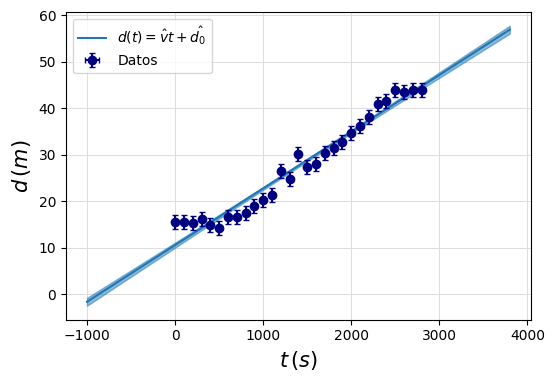

In [4]:
x = np.linspace(min(t - 1000), max(t) + 1000, 100) # evalúo a tiempos más largos que los que medí
y, sigma_y = lineal_ajustada(x, v, d0, sigma_t, cov) # recta de ajuste con incertezas

# dónde me dice el modelo que el cuerpo va a estar a tiempo t=3
print(f'd(t=3) = {y[-1]} ± {sigma_y[-1]}')

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_axisbelow(True)
ax.grid(True, c='gainsboro', linewidth=0.7)
ax.set_xlabel(r'$t\,(s)$', size=15)
ax.set_ylabel(r'$d\,(m)$', size=15)

ax.fill_between(x, y + sigma_y, y - sigma_y, color='tab:blue', alpha=0.5) # bandas de incerteza
ax.plot(x, y, color='tab:blue', label=r'$d(t) = \hat{v} t + \hat{d_0}$') # recta ajustada
ax.errorbar(t, d, yerr=sigma_d, xerr=sigma_t,
             fmt='o', c='navy', capsize=2, label='Datos') # datos con barras de incerteza
ax.legend()
plt.show()

a=0.0029041769041768992 ± 0.00022316836896034157
b=-2.090181818181815 ± 0.24411253445049869
cov(a, b) = -5.343982173044175e-05


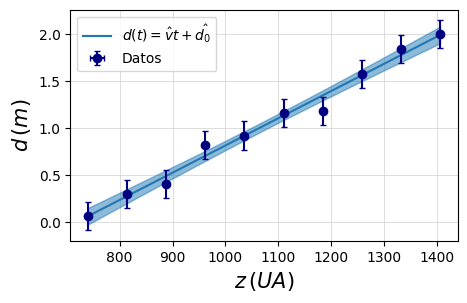

In [5]:
z = np.asarray([740, 814, 888, 962, 1036, 1110, 1184, 1258, 1332, 1406]) # datos del dispositivo (unidades arbitrarias)
d = np.asarray([0.06, 0.3 , 0.4 , 0.82, 0.92, 1.16, 1.18, 1.58, 1.84, 2.  ]) # datos de distancia (metros)

sigma_z = 0.03 # incerteza del dispositivo
sigma_d = 0.15 # incerteza en la distancia

# hago la regresión lineal usando la rutina `ajuste_lineal`
a, b, cov  = ajuste_lineal(z, d, sigma_z, sigma_d)

# incerteza en los parámetros de ajuste
sigma_a = cov[0, 0]**0.5
sigma_b = cov[1, 1]**0.5

print(f'a={a} ± {sigma_a}')
print(f'b={b} ± {sigma_b}')
print(f'cov(a, b) = {cov[0, 1]}')

# la regresión lineal ajustada me define la transformación entre la variable `z` y `d`
x = np.linspace(z[0], z[-1], 100) # evalúo la regresión en cualquier valor arbitrario de 'z'
y, sigma_y = lineal_ajustada(x, a, b, sigma_z, cov) # y la regresión lineal me dice a qué valor de `d` se corresponde, con su incerteza

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.set_axisbelow(True)
ax.grid(True, c='gainsboro', linewidth=0.7)
ax.set_xlabel(r'$z\,(UA)$', size=15)
ax.set_ylabel(r'$d\,(m)$', size=15)

ax.fill_between(x, y + sigma_y, y - sigma_y, color='tab:blue', alpha=0.5) # bandas de incerteza
ax.plot(x, y, color='tab:blue', label=r'$d(t) = \hat{v} t + \hat{d_0}$') # recta ajustada
ax.errorbar(z, d, yerr=sigma_d, xerr=sigma_z,
             fmt='o', c='navy', capsize=2, label='Datos') # datos con barras de incerteza
ax.legend()
plt.show()